In this exercise we will use the data we saw in the teaching session, the **absolute magnitudes** (*2MASS* $K_s$-band) of **Galactic** globular clusters.

We will also load a new dataset containing the **apparent magnitudes** (in the same band) of globular clusters in the ** *Andromeda Galaxy* (M31)**.

Let's load the packages and data that are necessary for the exercises.

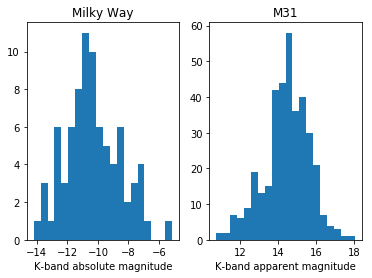

In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
"""
# Nearby Spiral Globular Cluster Systems I: Luminosity Functions;
# Nantais J.B., Huchra J.P., Barmby P., Olsen K.A.G., Jarrett T.H.,
# Astronomical Journal 131, 1416-1425 (2006)
"""

absolute_MWG = np.loadtxt("data/GC_MWG_absolute.dat")
apparent_M31 = np.loadtxt("data/GC_M31_apparent.dat")

plt.figure()
plt.subplot(121)
plt.title("Milky Way")
plt.hist(absolute_MWG, bins=20)
plt.xlabel("K-band absolute magnitude")

plt.subplot(122)
plt.title("M31")
plt.hist(apparent_M31, bins=20)
plt.xlabel("K-band apparent magnitude")
plt.show()

## Exercise 1: distribution of M31 globular clusters
### (a) Is the M31 data normally distributed? 

Use **at least two different parametric tests** from `scipy.stats` https://docs.scipy.org/doc/scipy/reference/stats.html.
You can try the `shapiro` or `normaltest` methods.

In [2]:
_, pvalue = st.shapiro(apparent_M31)
print("p-value: {:.3g}".format(pvalue))

p-value: 0.00102


In [3]:
_, pvalue = st.normaltest(apparent_M31)
print("p-value: {:.3g}".format(pvalue))

p-value: 0.00414


### (b) Test the normality of the M31 data using the Kolmogorov-Smirnov test.

What is your choice for the location and scale of the Gaussian distribution you test the data against?
Perform the K-S test and confirm that the produced $p$-value is... quite large.

In [4]:
# perform the K-S test using the Gaussian with mean and scale equal to the sample mean and standard deviation
mean = np.mean(apparent_M31)
std = np.std(apparent_M31)
normal_approximation = st.norm(loc=mean, scale=std)
_, pvalue = st.kstest(apparent_M31, normal_approximation.cdf)
print("p-value: {:.3g}".format(pvalue))

p-value: 0.108


**EXTRA CREDIT**. Why is the $p$-value large? Is there some weakness of the K-S test? Are there non-parametric tests that can bypass this complication? In order to figure it out, plot the empirical/theoretical PDFs and CDFs.

NameError: name 'x_empirical' is not defined

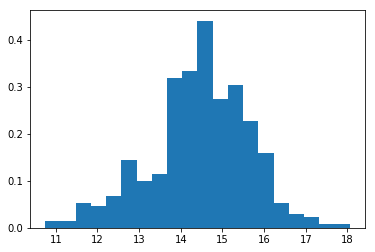

In [5]:
# Let's look at the empirical PDF and the normal approximation superposed...
plt.figure()
plt.hist(apparent_M31, bins=20, density=True)
plt.plot(x_empirical, normal_approximation.pdf(x_empirical))
plt.show()

# Why does the K-S test gives such a high p-value? Let's look at the CDF.
plt.figure()
x_empirical = np.sort(apparent_M31)
y_empirical = np.linspace(0.0, 1.0, len(x_empirical))

plt.step(x_empirical, y_empirical, "k-")
plt.plot(x_empirical, normal_approximation.cdf(x_empirical), "r--", linewidth=2)
plt.show()

In [ ]:
# The difference of the empirical and approximate distribution is significant in the tails
# K-S is not very sensitive at the tails... Let's use the Anderson-Darling test

statistic, critical_values, significance_levels = st.anderson(apparent_M31)
print("Statistic: {:.4g}".format(statistic))
for critical_value, significance_level in zip(critical_values, significance_levels):
    outcome = "OK" if statistic < critical_value else "FAIL"
    print("At {:4.1f} level, the critical value is {:4.2g}: {}".format(significance_level, critical_value, outcome))

### (c) What are the variances of M31 and Milky Way data? Are the significantly different? 

In https://docs.scipy.org/doc/scipy/reference/stats.html you can find various `scipy.stats` functions for testing equal variances. **Use at least two of the available methods**. You can try Levene, Bartlett, or Filgner-Killen tests.

In [ ]:
print("MWG variance = {:.4f}".format(np.var(absolute_MWG)))
print("M31 variance = {:.4f}".format(np.var(apparent_M31)))

print()
print("Test                     p-value")
print("--------------------------------")
_, pvalue = st.levene(absolute_MWG, apparent_M31)
print("Levene test              {:.2g}".format(pvalue))

_, pvalue = st.bartlett(absolute_MWG, apparent_M31)
print("Bertlett's test          {:.2g}".format(pvalue))

_, pvalue = st.fligner(absolute_MWG, apparent_M31)
print("Fligner-Killeen test     {:.2g}".format(pvalue))

## Exercise 2: the distance of M31

### (a) Compute the distance of M31

* Assumption 1: the globular clusters in Milky Way look like the ones in M31!

    This means that luminosity distribution of the GLs in both galaxies is the same. In addition to that, we assume that the spectral properties are also similar: for the same luminosity we would get the same absolute magnitude in the $K_s$ band.

    Therefore, we would expect that the mean absolute magnitude of both populations is the same.
    

* Assumption 2: our survey is complete!

    There are multiple obstacles in getting the full population of globular clusters: in the Milky Way we might miss those that are behind the MW disk and those not covered by surveys because our galaxy covers all the sky! In extragalactic surveys, due to the sensitivity limit, we might be able to uncover only the brightest objects.

    For the purpose of this exercise we assume that we got the full population. Bare in mind that there are statistical methods to **correct for incompleteness**.
    

* Remember that the distance modulus $\mu$, the absolute $M$ and apparent magnitude $m$ are connected through the formula:

    $$ \mu = m - M $$
    
    Also, the metric distance $d$ (in Mpc) can be computed from the distance modulus using

    $$ d = 10^{\mu / 5 - 5} $$

In [ ]:
mwg_mean, mwg_sem = np.mean(absolute_MWG), st.sem(absolute_MWG)
m31_mean, m31_sem = np.mean(apparent_M31), st.sem(apparent_M31)
print("Milky way mean absolute magnitude: {:.2f} +/- {:.2f}".format(mwg_mean, mwg_sem))
print("Andromeda mean apparent magnitude: {:.2f} +/- {:.2f}".format(m31_mean, m31_sem))

def to_metric(distance_modulus):
    """Convert a distance modulus to metric distance in Mpc."""
    return 10.0 ** (distance_modulus / 5.0 - 5)

modulus = m31_mean - mwg_mean
distance = to_metric(modulus)
print("Distance modulus = {:.3f}".format(modulus))
print("Distance = {:.3g} Mpc".format(distance))

#### (b) Can you use error propagation to estimate the uncertainty of the distance module estimate?

**Hint**: what is the uncertainty of $(a \pm \sigma_a) - (b \pm \sigma_b)$?

In [ ]:
# Error propagation theory: the standard deviation is the quadratic sum of the standard errors of the mean values.
modulus_error = (mwg_sem ** 2.0 + m31_sem ** 2.0) ** 0.5
print("Distance moudlus = {:.3f} +/- {:.3f}".format(modulus, modulus_error))

# converting to metric distance is not Gaussion anymore, therefore the +/- must be subtituted with a CI
distance = to_metric(modulus)
lower68 = to_metric(modulus - modulus_error)
upper68 = to_metric(modulus + modulus_error)
print("Distance = {:.3f} Mpc   |    68% CI = ({:.3f}, {:.3f}) Mpc".
      format(distance, lower68, upper68))

#### (c) Is the computed distance consistent with the Cepheid estimate for the distance modulus: $24.44 \pm 0.10\ \rm mag$?

**Hint**: assuming that the uncertainty of our estimate and the Cepheid estimate is Gaussian. What would be the distribution of their difference?

In [ ]:
cep_modulus = 24.44
cep_modulus_error = 0.1

print("Cepheid distance modulus = {:.2f} +/- {:.2f}".format(cep_modulus, cep_modulus_error))
cep_distance = to_metric(cep_modulus)
cep_lower68 = to_metric(cep_modulus - cep_modulus_error)
cep_upper68 = to_metric(cep_modulus + cep_modulus_error)
print("Cepheid distance = {:.3f} Mpc    |     68% CI: ({:.3f}, {:.3f}) Mpc".
      format(cep_distance, cep_lower68, cep_upper68))

# plot the two estimate's probability density
x = np.linspace(24, 25.5, 100)
y_result = st.norm.pdf(x, loc=modulus, scale=modulus_error)
y_theory = st.norm.pdf(x, loc=cep_modulus, scale=cep_modulus_error)
plt.figure()
plt.plot(x, y_result, label="Our result")
plt.plot(x, y_theory, label="Literature")
plt.legend(loc="upper right")
plt.xlabel("Distance modulus (mag)")
plt.ylabel("Probability density")
plt.show()

# HYPOTHESIS TESTING

# we may consider that the two estimates are consistent by testing whether their difference is consistent with zero

# we decide a significance level 5%
a = 0.05

# take the difference and its error (using propagation theory)
difference = (modulus - cep_modulus)
difference_error = (modulus_error ** 2.0 + cep_modulus_error ** 2.0) ** 0.5

# assuming normal distribution for the sample mean and the Cepheid estimate...
# their difference will also be normally distributed and we can use the Z-score to get a p-value
Z_score = difference / difference_error
print("Z score: {:.3g}".format(Z_score))
p_value = 2 * st.norm.cdf(-abs(Z_score))
print("p-value = {:.3f}".format(p_value))
if p_value < a:
    print("The two estimates are not consistent.")
else:
    print("The two estimates are consistent.")

#### (d) From the distance estimate, calculate the absolute magnitudes of M31 GCs. Check if they follow the same distribution as the absolute magnitude of Milky Way GCs.

Use two methods. The 2-sample K-S statistic (`scipy.stats.ks_2samp`) and Wilcoxon rank-sum (`scipy.stats.ranksums`) method.

In [ ]:
absolute_M31 = apparent_M31 - modulus

# Looking at the distributions
x_min = min(min(absolute_M31), min(absolute_MWG))
x_max = max(max(absolute_M31), max(absolute_MWG))
bins = np.linspace(x_min, x_max, 20)
plt.hist(absolute_M31, bins=bins, density=True, histtype="step")
plt.hist(absolute_MWG, bins=bins, density=True, histtype="step")
plt.show()

print("K-S 2-sample test")
statistic, pvalue = st.ks_2samp(absolute_M31, absolute_MWG)
print("  Statistic:  {:.3g}".format(statistic))
print("  p-value  :  {:.3g}".format(pvalue))

print("Wilcoxon rank-sum")
statistic, pvalue = st.ranksums(absolute_M31, absolute_MWG)
print("  Statistic:  {:.3g}".format(statistic))
print("  p-value  :  {:.3g}".format(pvalue))

## Extra credit: normal approximation of Poisson distribution

It is known that the normal distribution is a good approximation of Poisson distribution when the parameter $\lambda$ is large.

#### (a) Can you quantify this claim using sampling and hypothesis testing? Choose a sample size $N$ and some $\lambda$ values.

#### (b) Do the results depend on the sample size?

#### (c) Do the results depend on the testing method?

In [ ]:
plt.figure()
sample_size = 1000
poisson_means_to_test = [0.5, 3, 10, 30]
for poisson_mean in poisson_means_to_test:
    sample = st.poisson.rvs(poisson_mean, size=sample_size)
    statistic, pvalue = st.shapiro(sample)
    print("For l={:.3g}".format(poisson_mean))
    print("  SW: p-value = {:.3g}".format(pvalue))
    
    norm_cdf = st.norm(loc=poisson_mean, scale=poisson_mean ** 0.5).cdf
    statistic, pvalue = st.kstest(sample, norm_cdf)
    print("  KS: p-value = {:.3g}".format(pvalue))
    
    nbins = min(15, max(sample) - min(sample) + 1)
    plt.hist(sample, bins=nbins, label=r"$\lambda = {:.2g}$".format(poisson_mean), histtype="step")
plt.legend()
plt.show()